# PSQL

In [11]:
import os
from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData


def construct_connection_string() -> str:
    """Construct a connection string needed to connect to database."""
    connection_string = (
        f"postgresql+psycopg2://"
        f"{os.getenv('PSQL_USER', 'free-practice')}:{os.getenv('PSQL_PASSWORD', 't)ZmEE*HgZQ<SF2Wm,VaNzdv')}"
        f"@{os.getenv('PSQL_HOST', 'localhost')}:{os.getenv('PSQL_PORT', 5432)}"
        f"/{os.getenv('PSQL_DATABASE', 'fp1')}"
    )

    if bool(int(os.getenv("SSL_DISABLED", 0))):
        connection_string += "?sslmode=disable"

    return connection_string


engine = create_engine(construct_connection_string(), echo=True)

In [12]:
meta = MetaData()

tracks = Table("tracks", meta, Column("id", Integer, primary_key=True), Column("name", String))
meta.create_all(engine)

2022-11-18 17:58:01,833 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2022-11-18 17:58:01,834 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-11-18 17:58:02,031 INFO sqlalchemy.engine.Engine select current_schema()
2022-11-18 17:58:02,032 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-11-18 17:58:02,232 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2022-11-18 17:58:02,233 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-11-18 17:58:02,441 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-11-18 17:58:02,442 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2022-11-18 17:58:02,442 INFO sqlalchemy.engine.Engine [generated in 0.00034s] {'name': 'tracks'}
2022-11-18 17:58:02,642 INFO sqlalchemy.engine.Engine 
CREATE TABLE tracks (
	id SERIAL NOT NULL, 
	name VARCHAR, 
	PRIMARY KEY (id)
)


2022-11-18 17:58:02,643 INFO sqlalchemy.engine.Engine

Now we query a specific session and get the data back as a Pandas DataFrame.

Check it out at the [Pitwall](https://pitwall.b4mad.racing/d/6d57246de74745198b3385f5e446e81cf7127b47/session?orgId=1&var-SessionId=1667228407&time=1667229411221&time.window=3600000&from=1667228301041&to=1667229529783)

Since it's a single session, but Influx requires a range, we query 10 years in the past.

In [13]:
conn = engine.connect()
ins = students.insert().values(name="Ravi", lastname="Kapoor")
result = conn.execute(ins)

2022-11-18 17:58:03,907 INFO sqlalchemy.engine.Engine INSERT INTO students (name, lastname) VALUES (%(name)s, %(lastname)s) RETURNING students.id
2022-11-18 17:58:03,908 INFO sqlalchemy.engine.Engine [generated in 0.00051s] {'name': 'Ravi', 'lastname': 'Kapoor'}
2022-11-18 17:58:04,115 INFO sqlalchemy.engine.Engine COMMIT


Now we can plot the data, starting with just the brake inputs and the time on the x axis.

In [14]:
brake = df.copy()
brake = brake[["Brake", "_time"]]
brake["datetime"] = pd.to_datetime(brake["_time"])
brake.drop(columns=["_time"], inplace=True)
brake.set_index("datetime", inplace=True)
brake.sort_index(inplace=True)
plt.rcParams["figure.figsize"] = (10, 2)
brake.plot()

NameError: name 'df' is not defined

Now plot every other value column, the x-axis is the just the index of the DataFrame.

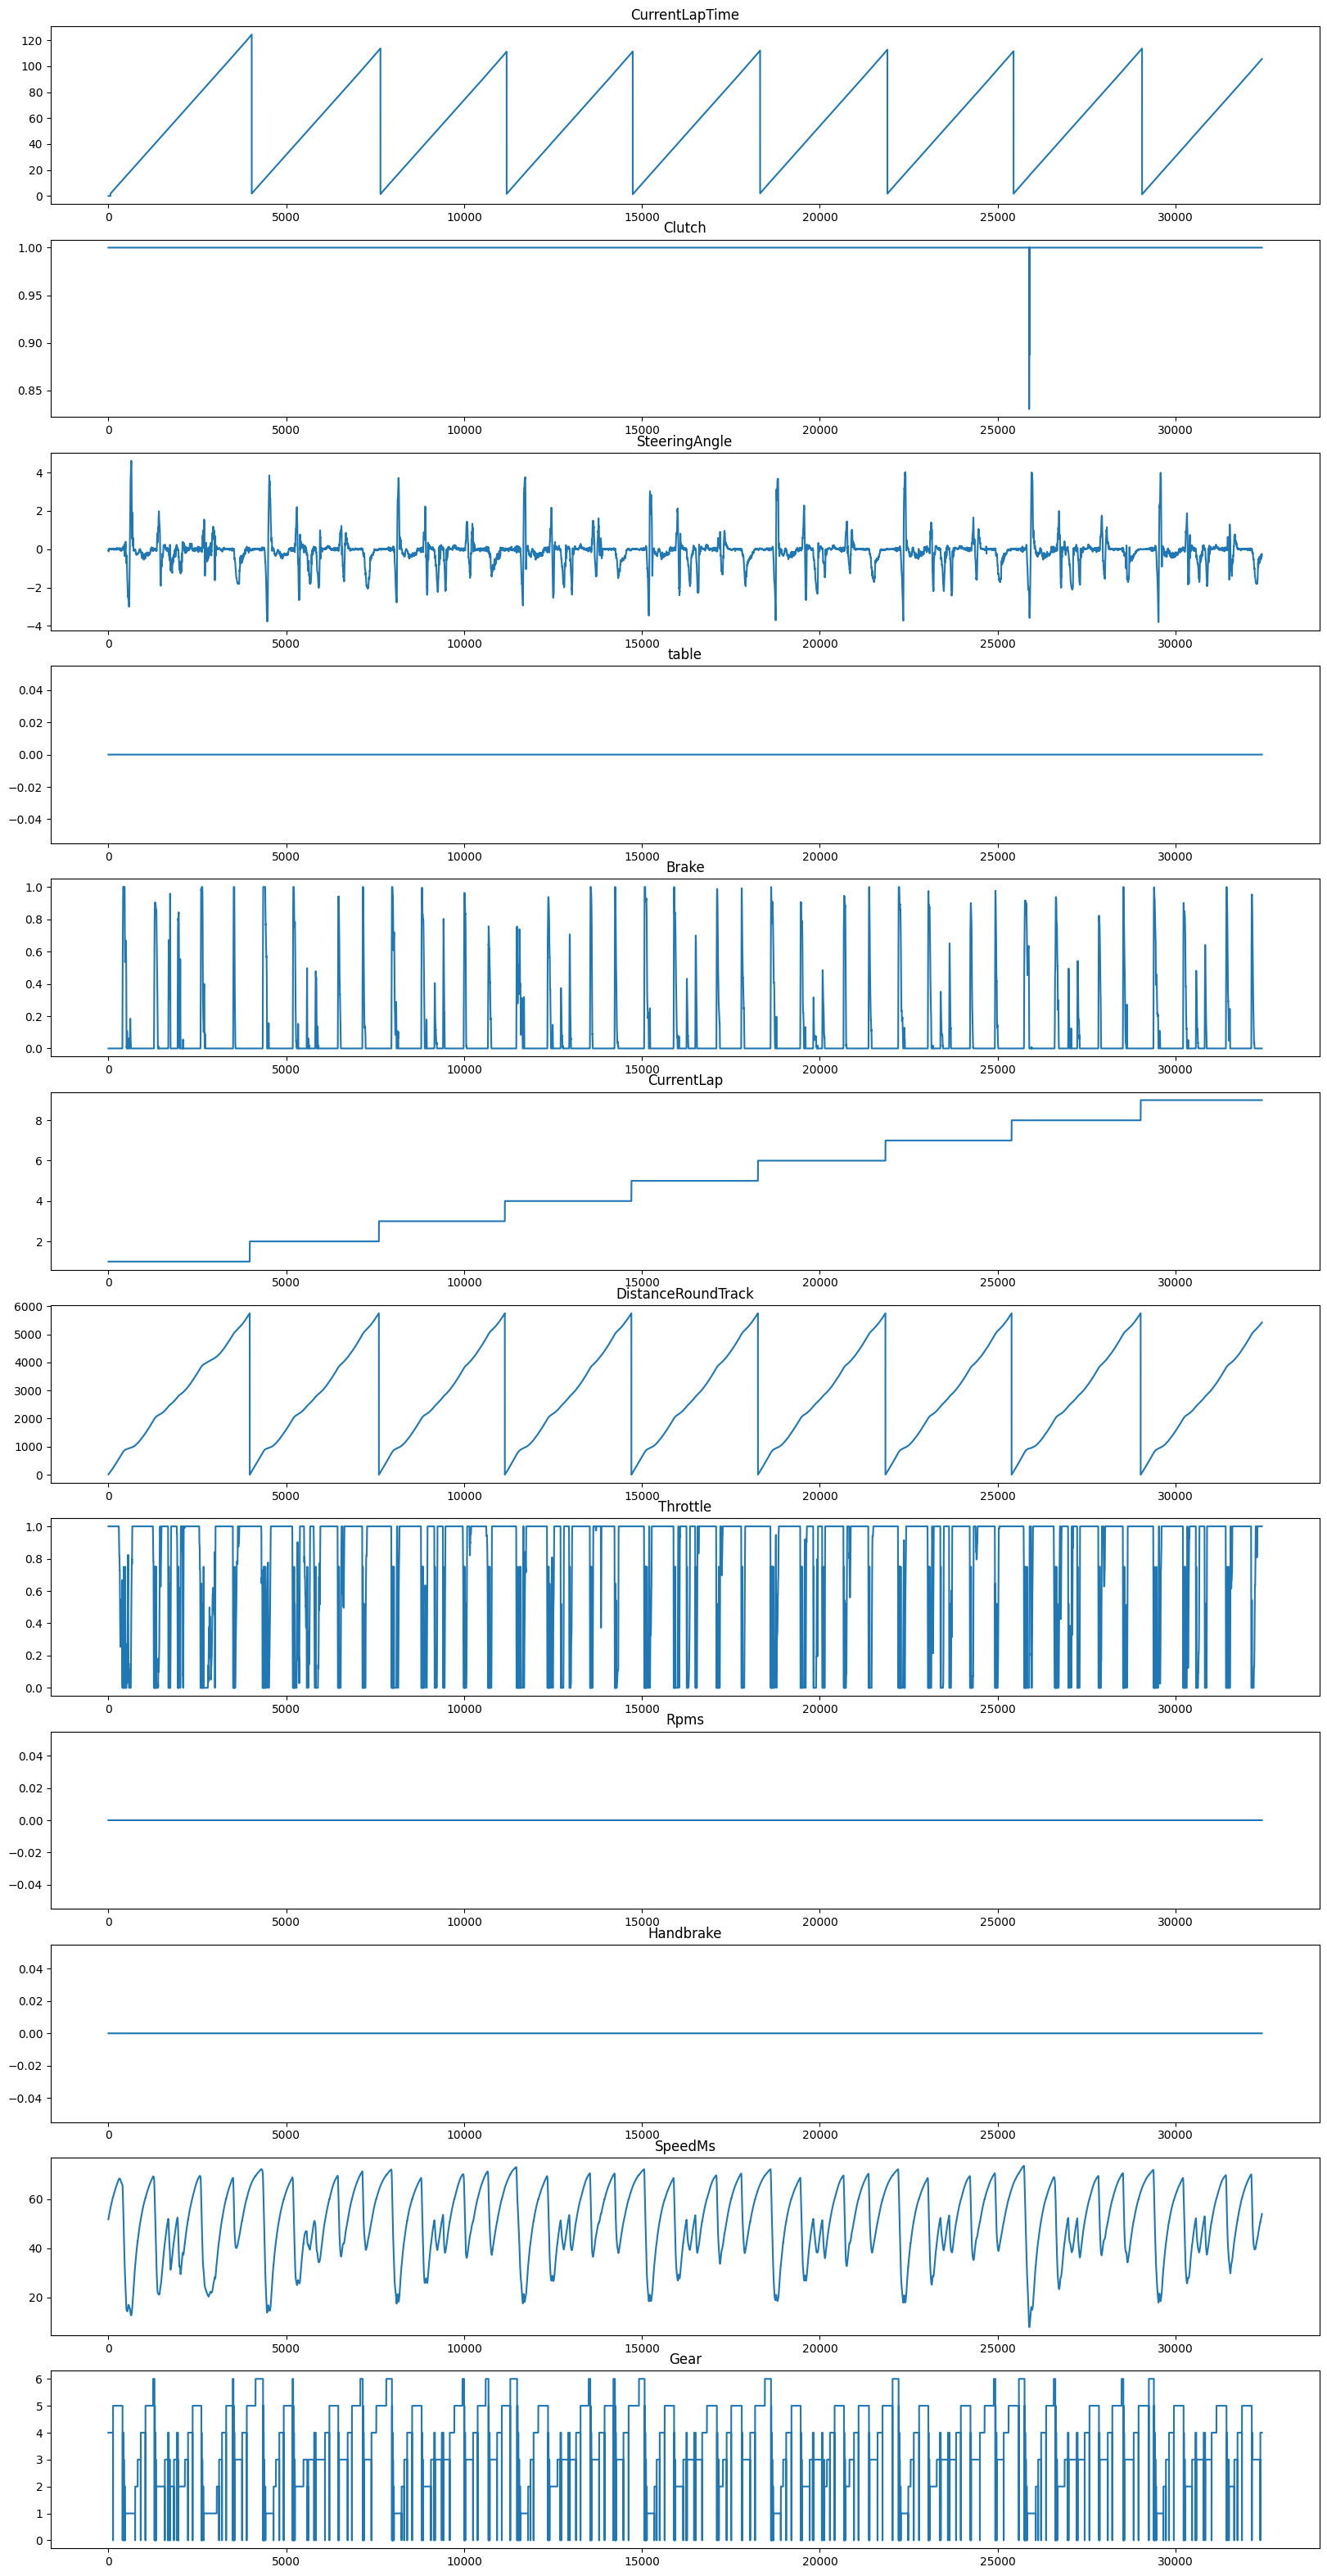

In [ ]:
plt.rcParams["figure.figsize"] = (20, 40)
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
newdf = df.select_dtypes(include=numerics)
cols = set(newdf.columns)
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    newdf[c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

And just a single lap.

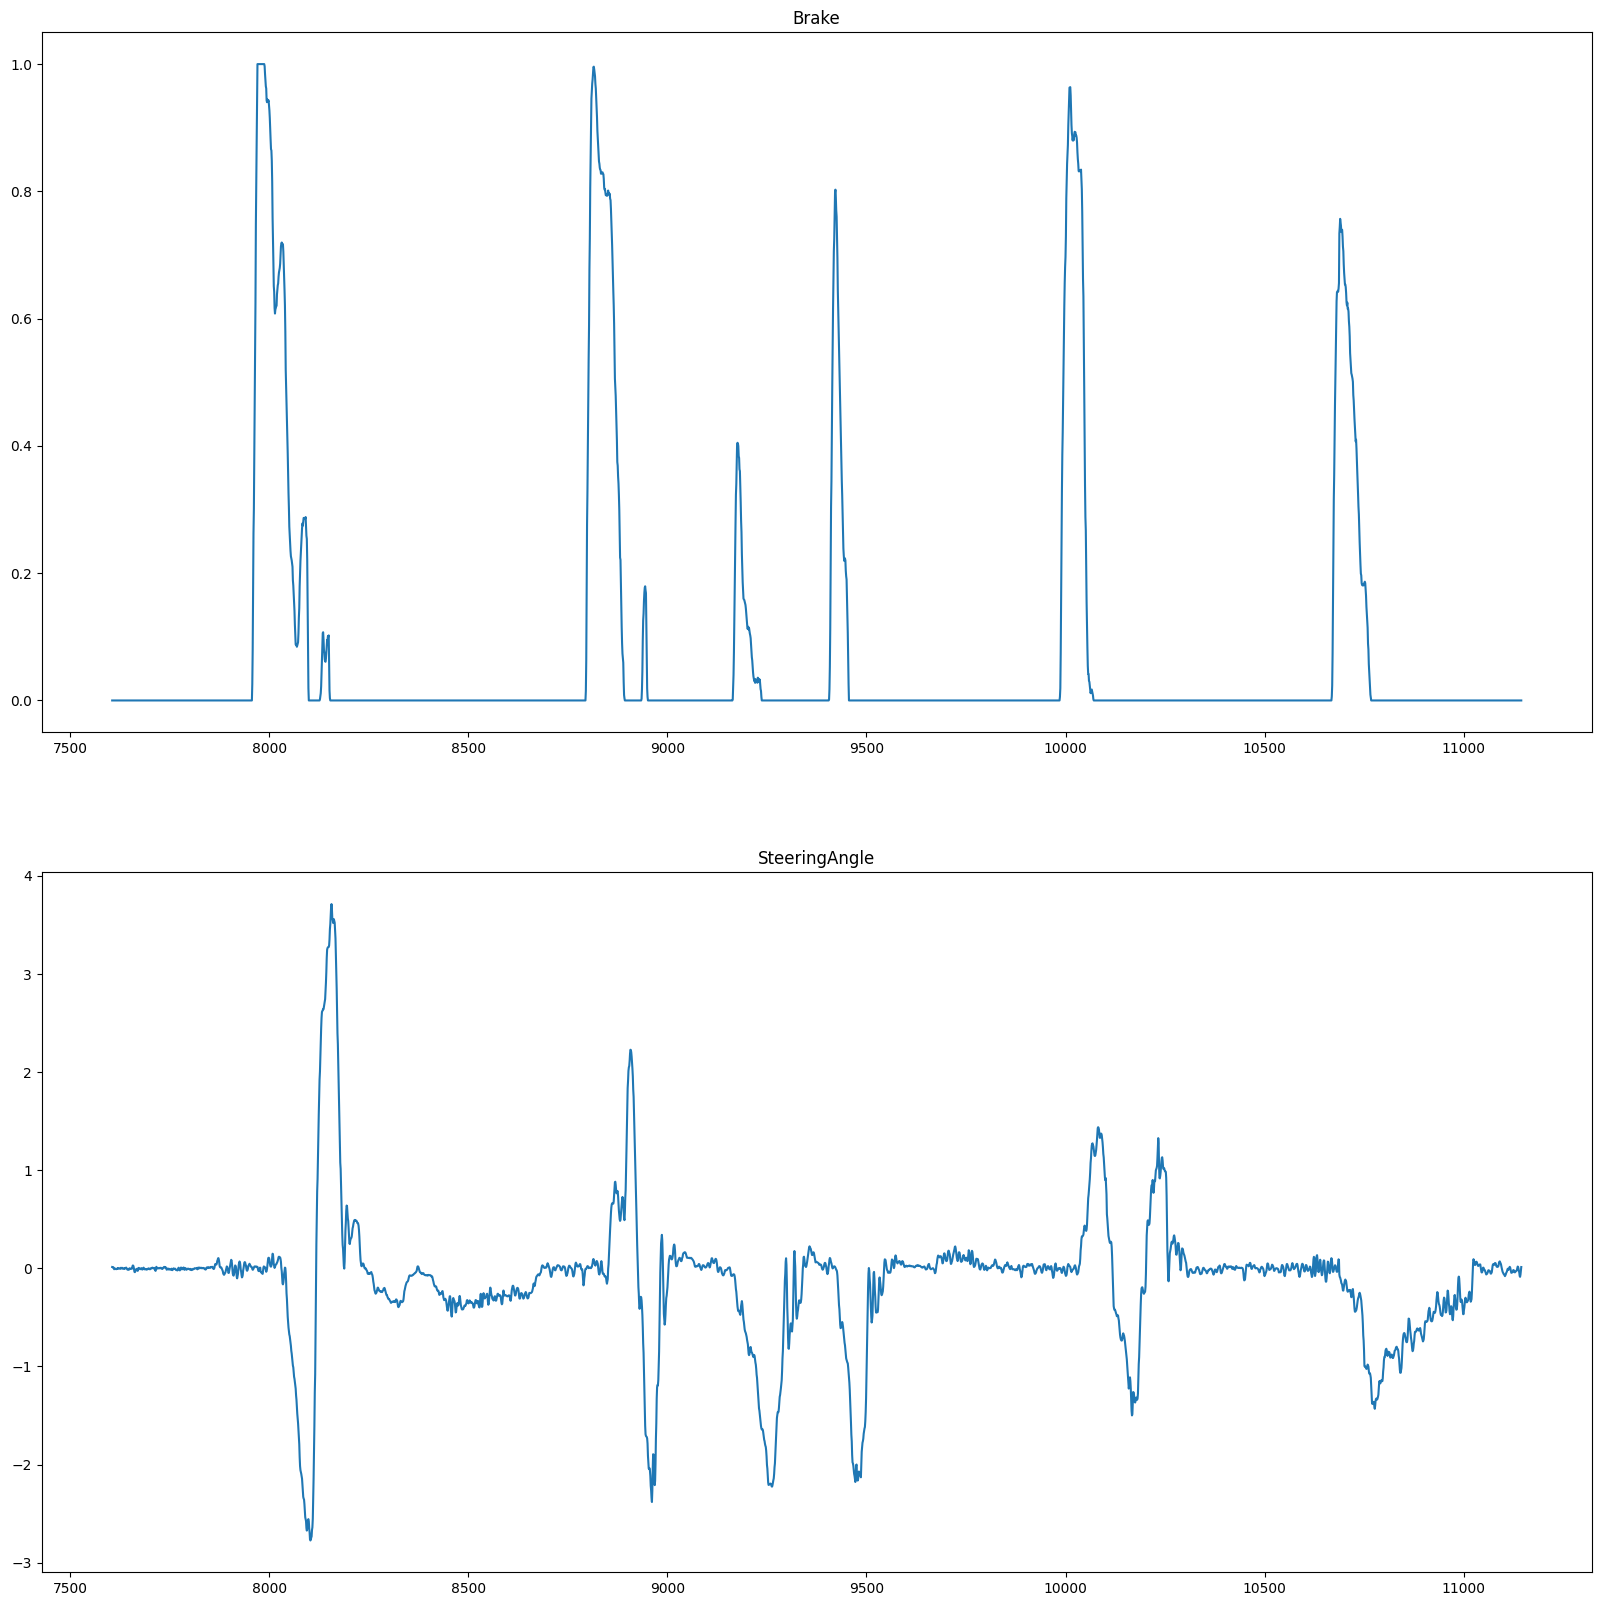

In [ ]:
lap = 3
plt.rcParams["figure.figsize"] = (20, 20)
cols = ["Brake", "SteeringAngle"]
fig, ax = plt.subplots(len(cols))
ax
for i, c in enumerate(cols):
    df.loc[df["CurrentLap"] == lap, c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

Now we plot all brake values for all laps against the distance.

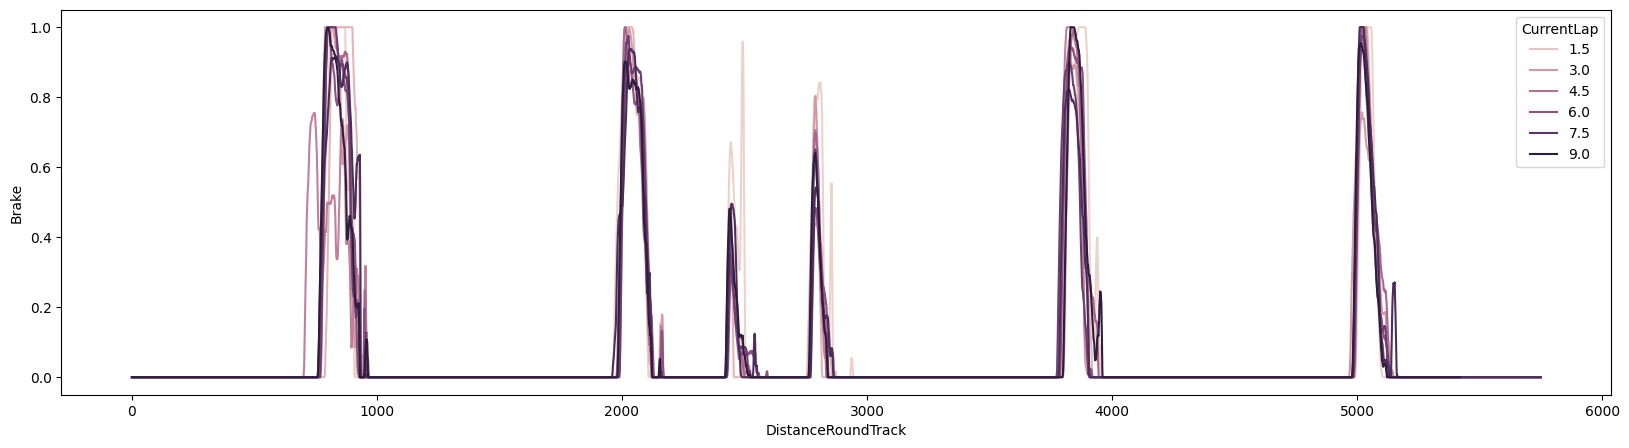

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 5)
for c in ["Brake"]:
    sns.lineplot(data=df, x="DistanceRoundTrack", y=c, hue="CurrentLap", legend=True)
    plt.show()